In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import ast

In [2]:
def get_resdf(file_t, start, end):
    fd = "../results/data"
    res_str = "{'board_type':"
    res_cols = ["agent2_MCTS_sims", "agent1_p1_wins", "agent1_p2_wins", "agent2_p1_wins", "agent2_p2_wins"]
    df = pd.DataFrame(columns=res_cols)

    for sims in range(start, end+1, 50):
        fn = file_t.format(sims)
        with open(os.path.join(fd, fn)) as file:
            results = [ast.literal_eval(line[line.find(res_str):]) for line in file if res_str in line]
        dfs = pd.DataFrame(results)[res_cols]
        df = df.append(dfs)

    df = df.groupby(['agent2_MCTS_sims']).sum()
    return df

In [3]:
def plot_results(df, title):
    prcn = ["NN wins as Player 1", "NN wins as Player 2", "MCTS wins as Player 1", "MCTS wins as Player 2"]
    df = df.rename_axis("MCTS Simulations per Move")
    df.columns = prcn
    df["NN total wins"] = df[prcn[0]] + df[prcn[1]]
    df["MCTS total wins"] = df[prcn[2]] + df[prcn[3]]

    plt.rcParams['figure.figsize'] = [15, 5]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)

    df[["NN total wins", "MCTS total wins"]].plot(ax=ax1, marker="+")
    ax1.legend(loc='best')
    df[prcn].plot(ax=ax2, marker="+")
    ax2.legend(loc='best')


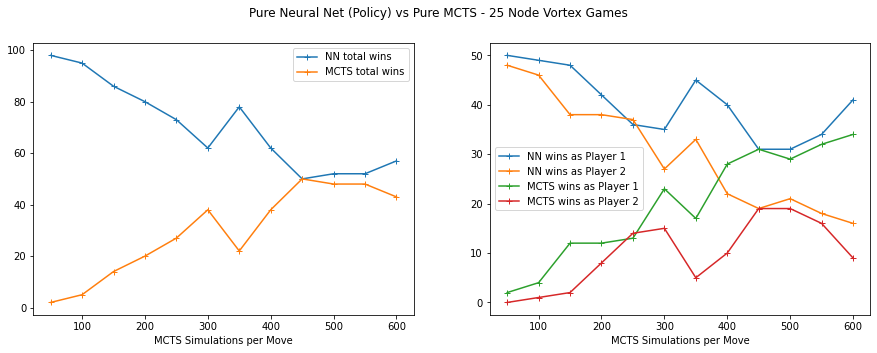

In [4]:
df = get_resdf("results_5x5_{}s.txt", 50, 600)
plot_results(df, "Pure Neural Net (Policy) vs Pure MCTS - 25 Node Vortex Games")

#df.columns = ["NNP1", "NNP2", "MCTSP1", "MCTSP2"]
#print(df)

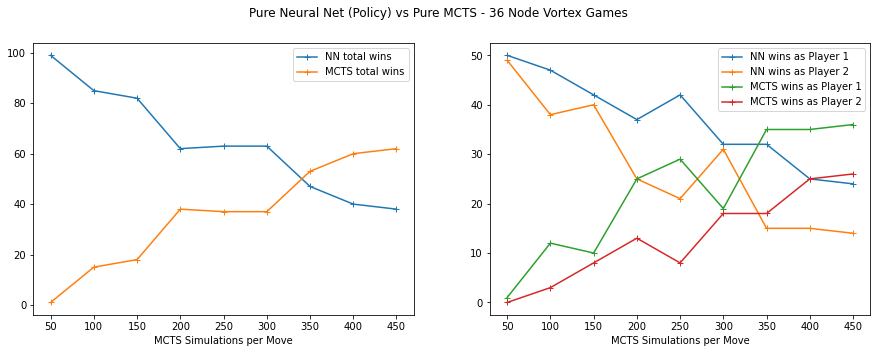

In [5]:
df = get_resdf("results_6x6_{}s.txt", 50, 450)
plot_results(df, "Pure Neural Net (Policy) vs Pure MCTS - 36 Node Vortex Games")


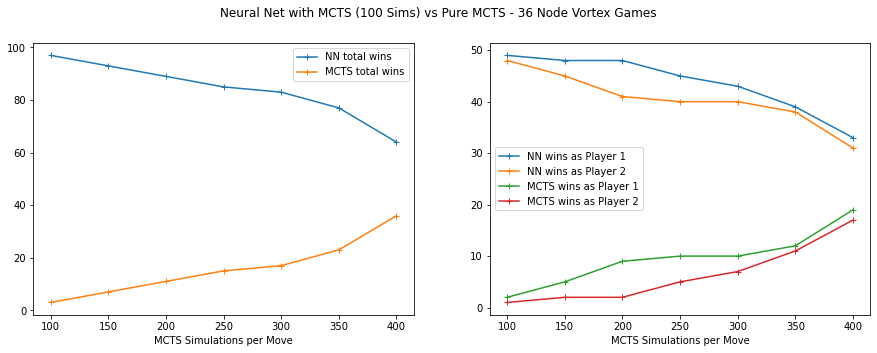

In [7]:
df = get_resdf("results_MCTSnet100_6x6_{}s.txt", 100, 400)
plot_results(df, "Neural Net with MCTS (100 Sims) vs Pure MCTS - 36 Node Vortex Games")